NAME: Vishal Fenn

NJIT UCID: vkf

EMAIL ADDRESS: vkf@njit.edu

<11/18/2024>

Professor: Yasser Abduallah

CS 634 <101> 

# Final Project - Data Mining

For this project, I am using the sentiment labelled dataset that is based on whether movie reviews are positive or negative. I have implemented 3 machine learning algorithms to be used for Binary Classification of my datataset:
+ **Random Forest**
  
+ **Support Vector Machine**

  
+ **Bidirectional LSTM (Deep Learning)**




**Tutorial**

1. Python 3.12.6 is the version used for this program. Make sure to have this or the latest version of python 3 installed.

2. In order to run the program in python, clone this repository to your home directory, by opening a `cmd` terminal and then clone the repository to your location of choice, recommend putting it somewhere in the home directory.
3. Then `git clone https://github.com/VkfNJIT/DataMiningFinal.git`

4. Change directory to the path of the cloned repository using `cd path/to/project` on the command line

5. List all the files and folders in the your path using the `ls` command.

6. Then you want make sure you have the dependencies installed in order to run the algorithm successfully, so enter `pip install -r requirements.txt`

7. Once that has been successfully completed, on your terminal type:
    + `python fenn_vishal_finaltermproj.py`

In [1]:
# Data Processing
import os
import sys
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
from sklearn.metrics import brier_score_loss, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from scipy.stats import randint, uniform

2024-11-20 15:14:52.035702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-20 15:14:52.114639: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-20 15:14:52.133672: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 15:14:52.227802: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-20 15:14:53.648132: W tensorflow/compiler/tf2

In [2]:
def metrics_function(confusion_matrix):
    TP = confusion_matrix[0][0]
    FP = confusion_matrix[1][0]
    FN = confusion_matrix[0][1]
    TN = confusion_matrix[1][1]
    TPR = TP / (TP + FN) # Recall
    TNR = TN / (TN + FP)
    FPR = FP / (TN + FP)
    FNR = FN / (TP + FN)
    FDR = FP / (FP + TP)
    NPV = TN / (TN + FN)
    BACC = (TPR + TNR) / 2
    TSS = TPR - FPR
    ACCURACY = (TP + TN) / (TP + FP + FN + TN)
    PRECISION = TP / (TP + FP)
    ERROR_RATE = (FP + FN) / (TP + FP + FN + TN)
    F1 = (2 * TP) / (2 * TP + FP + FN)
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))
    return [TP, TN, FP, FN, TPR, TNR, FPR, FNR, NPV, FDR, PRECISION, F1, ACCURACY, ERROR_RATE, BACC, TSS, HSS]


In [3]:
# Get data features and labels
# Split the data into features (X) and target (y)

sentiment_data = pd.read_csv(f'{os.getcwd()}/fenn_vishal_finaltermproj.csv')
X = sentiment_data["Sentence"]
y = sentiment_data['Score']
train_sentiment, test_sentiment, train_score, test_score = train_test_split(X, y, test_size=0.3)

vectorizer = CountVectorizer()

vector_sentiment_train = vectorizer.fit_transform(train_sentiment)
vector_sentiment_test = vectorizer.transform(test_sentiment)


Best hyperparameters: {'max_depth': 17, 'n_estimators': 252}


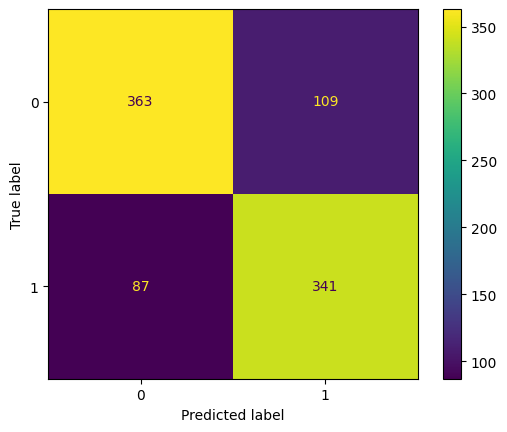

In [4]:
#Random Forrest Implementation
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=10, 
                                 cv=10)

# Fit the random search object to the data
rand_search.fit(vector_sentiment_train, train_score)
# # Create a variable for the best model
best_rf = rand_search.best_estimator_

# # Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

#Confusion Matrix setup, prediction with the best models
predicted_score_best = best_rf.predict(vector_sentiment_test)
cm = confusion_matrix(test_score, predicted_score_best)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();


Best Hyperparameters:  {'C': 6.420654673106286, 'gamma': 0.03906939937054617, 'kernel': 'rbf'}


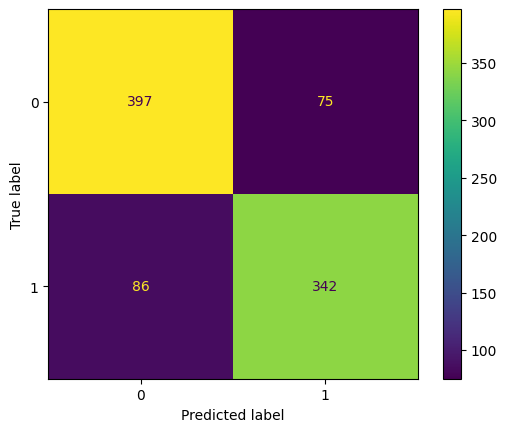

In [5]:
# Support Vector Machine Implementation
svm = SVC()
param_dist = {
    'C': uniform(0.1, 10),  # Uniform distribution between 0.1 and 10
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50))
}
randomized_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=10, cv=10)

randomized_search.fit(vector_sentiment_train, train_score)

print("Best Hyperparameters: ", randomized_search.best_params_)
best_svm = randomized_search.best_estimator_

predicted_score_best_svm = best_svm.predict(vector_sentiment_test)
cm_svm = confusion_matrix(test_score, predicted_score_best_svm)

ConfusionMatrixDisplay(confusion_matrix=cm_svm).plot();





I0000 00:00:1732133908.150981    3517 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-20 15:18:28.354298: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


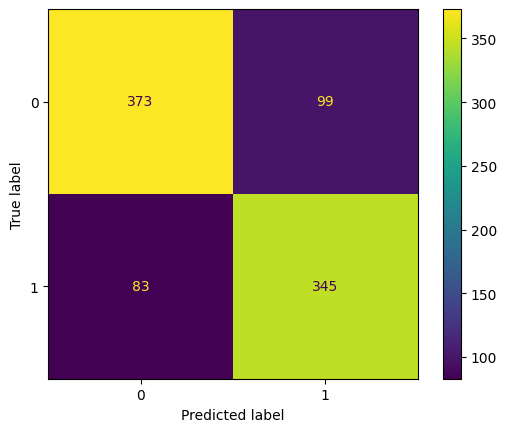

In [6]:
# Bidirectional LSTM Implementation 
VOCAB_SIZE = 3000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(np.array(train_sentiment))
biLSTM = tf.keras.Sequential([encoder,
                           tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),
                                                     output_dim=64,
        # Use masking to handle the variable sequence lengths
                                                     mask_zero=True),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid')])

biLSTM.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
	# fit model
biLSTM.fit(np.array(train_sentiment), np.array(train_score), epochs=10, batch_size=64, verbose=0)

predicted_score = biLSTM.predict(test_sentiment, verbose=0)
# print(predicted_score)
predicted_score_class = (predicted_score > 0.5).astype("int64")
cm_biLSTM = confusion_matrix(test_score, predicted_score_class)
ConfusionMatrixDisplay(confusion_matrix=cm_biLSTM).plot();

In [7]:
rf_evaluate = []
svm_evaluate = []
biLSTM_evaluate = []
metric_des = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'NPV', 'FDR', 'Precision','F1_measure', 'Accuracy', 'Error_rate', 'BACC', 
              'TSS', 'HSS', 'Brier_Score_loss', 'ROC_AUC']
# Implement KFold cross validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
iter = 0
for tr_index, ts_index in k_fold.split(X):
    iter += 1
    print(f'Iteration {iter}')
    train_sentiment_inx, test_sentiment_inx = X[tr_index], X[ts_index]
    train_score_inx, test_score_inx = y[tr_index], y[ts_index]
    rf_model_iter = RandomForestClassifier(max_depth=best_rf.max_depth, n_estimators=best_rf.n_estimators) # Initialize RF with best params
    svm_model_iter = SVC(C=best_svm.C, gamma=best_svm.gamma, kernel=best_svm.kernel) # Initialize SVM with best params
    VOCAB_SIZE = 3000
    encoder_iter = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
    encoder_iter.adapt(np.array(train_sentiment_inx))
    biLSTM_model_iter = tf.keras.Sequential([encoder_iter, tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),
                                                     output_dim=64,
                                                     mask_zero=True),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid')])
    biLSTM_model_iter.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
    vectorizer_inx = CountVectorizer()
    vector_sentiment_train_inx = vectorizer_inx.fit_transform(train_sentiment_inx)
    vector_sentiment_test_inx = vectorizer_inx.transform(test_sentiment_inx)
     # Fit models with training data and label for each iteration
    rf_model_iter.fit(vector_sentiment_train_inx, train_score_inx)
    svm_model_iter.fit(vector_sentiment_train_inx, train_score_inx)
    biLSTM_model_iter.fit(np.array(train_sentiment_inx), np.array(train_score_inx), epochs=10, batch_size=64, verbose=0)
    # Get the Predicted value for the models for each iteration
    predicted_rf_inx = rf_model_iter.predict(vector_sentiment_test_inx)
    predicted_svm_inx = svm_model_iter.predict(vector_sentiment_test_inx)
    predicted_biLSTM = biLSTM_model_iter.predict(test_sentiment_inx, verbose=0)
    predicted_biLSTM_inx = (predicted_biLSTM > 0.5).astype("int64")
    # Get the confusion matrix for the models for each iteration
    cm_rf_inx = confusion_matrix(test_score_inx, predicted_rf_inx)
    cm_svm_inx = confusion_matrix(test_score_inx, predicted_svm_inx)
    cm_biLSTM_inx = confusion_matrix(test_score_inx, predicted_biLSTM_inx)
    rf_metric_inx = metrics_function(cm_rf_inx)
    rf_metric_inx.extend([brier_score_loss(test_score_inx, predicted_rf_inx), roc_auc_score(test_score_inx, predicted_rf_inx)])
    svm_metric_inx = metrics_function(cm_svm_inx)
    svm_metric_inx.extend([brier_score_loss(test_score_inx, predicted_svm_inx), roc_auc_score(test_score_inx, predicted_svm_inx)])
    biLSTM_metric_inx = metrics_function(cm_biLSTM_inx)
    biLSTM_metric_inx.extend([brier_score_loss(test_score_inx, predicted_biLSTM_inx), roc_auc_score(test_score_inx, predicted_biLSTM_inx)])
    rf_evaluate.append(rf_metric_inx)
    svm_evaluate.append(svm_metric_inx)
    biLSTM_evaluate.append(biLSTM_metric_inx)
    evaluated_metrics = pd.DataFrame([rf_metric_inx, svm_metric_inx, biLSTM_metric_inx], columns=metric_des, index=['RF', 'SVM', 'BiLSTM'])
    print(evaluated_metrics.round(2).T)
    

Iteration 1
                      RF     SVM  BiLSTM
TP                119.00  113.00  108.00
TN                117.00  140.00  142.00
FP                 47.00   24.00   22.00
FN                 17.00   23.00   28.00
TPR                 0.88    0.83    0.79
TNR                 0.71    0.85    0.87
FPR                 0.29    0.15    0.13
FNR                 0.12    0.17    0.21
NPV                 0.87    0.86    0.84
FDR                 0.28    0.18    0.17
Precision           0.72    0.82    0.83
F1_measure          0.79    0.83    0.81
Accuracy            0.79    0.84    0.83
Error_rate          0.21    0.16    0.17
BACC                0.79    0.84    0.83
TSS                 0.59    0.68    0.66
HSS                 0.58    0.68    0.66
Brier_Score_loss    0.21    0.16    0.17
ROC_AUC             0.79    0.84    0.83
Iteration 2
                      RF     SVM  BiLSTM
TP                118.00  144.00  135.00
TN                118.00  114.00  117.00
FP                 19.00   23.00 

In [8]:
iterations = ['Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4', 'Iteration 5',
              'Iteration 6', 'Iteration 7', 'Iteration 8', 'Iteration 9', 'Iteration 10']
print("---------------------Performance Evaluation of Random Forrest---------------------------")
rf_metric_evaluate = pd.DataFrame(rf_evaluate, columns=metric_des, index=iterations)
print(rf_metric_evaluate.round(2).T)
print()
print("---------------------Performance Evaluation of Support Vector Machine-------------------")
svm_metric_evaluate = pd.DataFrame(svm_evaluate, columns=metric_des, index=iterations)
print(svm_metric_evaluate.round(2).T)
print()
print("---------------------Performance Evaluation of Bidirectional Long Short Term Memory-----")
biLSTM_metric_evaluate = pd.DataFrame(biLSTM_evaluate, columns=metric_des, index=iterations)
print(biLSTM_metric_evaluate.round(2).T)

---------------------Performance Evaluation of Random Forrest---------------------------
                  Iteration 1  Iteration 2  Iteration 3  Iteration 4  \
TP                     119.00       118.00       130.00       139.00   
TN                     117.00       118.00       111.00       100.00   
FP                      47.00        19.00        39.00        32.00   
FN                      17.00        45.00        20.00        29.00   
TPR                      0.88         0.72         0.87         0.83   
TNR                      0.71         0.86         0.74         0.76   
FPR                      0.29         0.14         0.26         0.24   
FNR                      0.12         0.28         0.13         0.17   
NPV                      0.87         0.72         0.85         0.78   
FDR                      0.28         0.14         0.23         0.19   
Precision                0.72         0.86         0.77         0.81   
F1_measure               0.79         0.79     

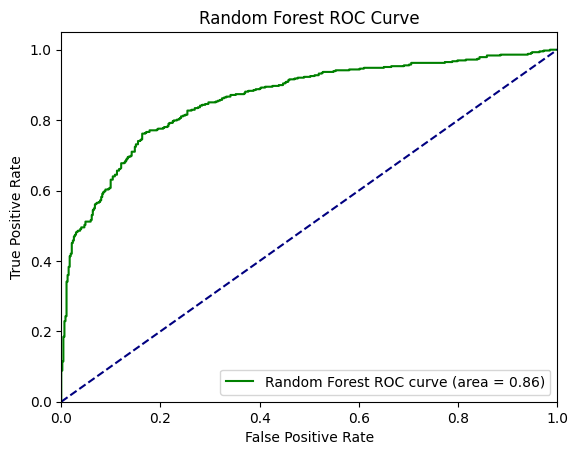

In [9]:
# Random Forest Model AUC
rf_model = RandomForestClassifier(max_depth=best_rf.max_depth, n_estimators=best_rf.n_estimators)

rf_model.fit(vector_sentiment_train, train_score)
# Obtain predicted probabilities
predict_score_prob = rf_model.predict_proba(vector_sentiment_test)[:,1]

# Compute ROC curve and ROC area
fpr_rf, tpr_rf, _ = roc_curve(test_score, predict_score_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
# Plot Random Forest ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color="green", label=f"Random Forest ROC curve (area = {round(roc_auc_rf, 2)})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()


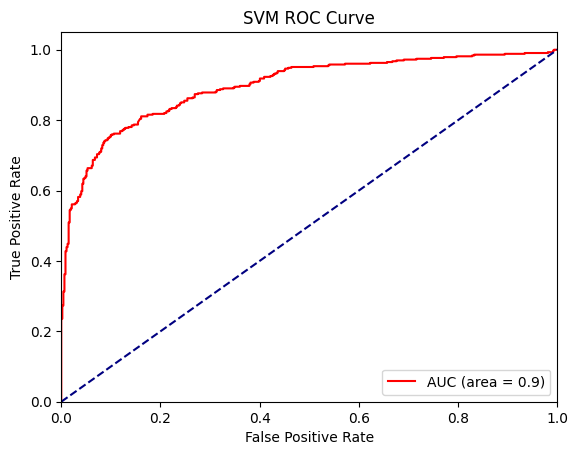

In [10]:
svm_model = SVC(C=best_svm.C, gamma=best_svm.gamma, kernel=best_svm.kernel, probability=True)
svm_model.fit(vector_sentiment_train, train_score)
# Obtain predicted probabilities
predicted_svm_score = svm_model.predict_proba(vector_sentiment_test)[:,1]
# Compute ROC curve and ROC area
fpr_svm, tpr_svm, _ = roc_curve(test_score, predicted_svm_score)
roc_auc_svm = auc(fpr_svm, tpr_svm)
# Plot SVM ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color="red", label=f"AUC (area = {round(roc_auc_svm,2)})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend(loc="lower right")
plt.show()


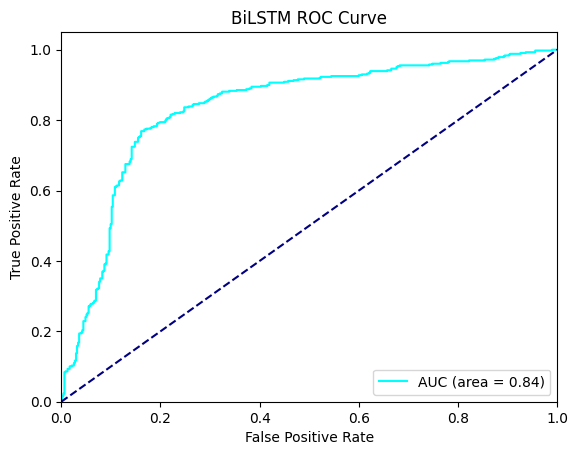

In [11]:
VOCAB_SIZE = 3000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(np.array(train_sentiment))
biLSTM_model = tf.keras.Sequential([encoder,
                           tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),
                                                     output_dim=64,
        # Use masking to handle the variable sequence lengths
                                                     mask_zero=True),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid')])

biLSTM_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
	# fit model
biLSTM_model.fit(np.array(train_sentiment), np.array(train_score), epochs=10, batch_size=64, verbose=0)

predicted_score_biLSTM = biLSTM_model.predict(test_sentiment, verbose=0)
fpr_biLSTM, tpr_biLSTM, _ = roc_curve(test_score, predicted_score_biLSTM)
roc_auc_biLSTM = auc(fpr_biLSTM, tpr_biLSTM)

plt.figure()
plt.plot(fpr_biLSTM, tpr_biLSTM, color="aqua", label=f"AUC (area = {round(roc_auc_biLSTM,2)})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("BiLSTM ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [12]:
rf_average = rf_metric_evaluate.mean()
svm_average = svm_metric_evaluate.mean()
biLSTM_average = biLSTM_metric_evaluate.mean()
average_performance = pd.DataFrame({'RF_Average': rf_average, 'SVM_Average': svm_average, 'BiLSTM_Average': biLSTM_average}, index=metric_des)
print(average_performance.round(2))


                  RF_Average  SVM_Average  BiLSTM_Average
TP                    124.60       128.90          121.70
TN                    112.50       124.60          124.50
FP                     37.50        25.40           25.50
FN                     25.40        21.10           28.30
TPR                     0.83         0.86            0.81
TNR                     0.75         0.83            0.83
FPR                     0.25         0.17            0.17
FNR                     0.17         0.14            0.19
NPV                     0.82         0.85            0.81
FDR                     0.23         0.16            0.17
Precision               0.77         0.84            0.83
F1_measure              0.80         0.85            0.82
Accuracy                0.79         0.84            0.82
Error_rate              0.21         0.16            0.18
BACC                    0.79         0.84            0.82
TSS                     0.59         0.69            0.64
HSS           

# EVALUATION 
For my dataset, given that the labels are either positive or negative sentiments, I think false negatives would be better to put emphasis on, to check how many times a movie review was predicted to be negative, but was actually positive. Negativity usually gets more attention when it comes to media. 
When comparing Random Forest(RF), Support Vector Machine(SVM), Bidirectional LSTM(BiLSTM) for performance evaluation. The SVM appears to perform the best overall when evaluated based on Accuracy, F1 Measure, and has the lowest error rate on average and having the least false negatives. One of the reasons for this perfomance is because the dataset is pretty small, with $3000$ data points and only $1$ feature. SVM tend to perform better than Deep Learning models like BiLSTM when it comes to smaller datasets, since deep learning models would require larger amounts of data. The reason that RF performed worse overall and this may be due to fact Random Forests may struggle with high-dimensional sparse data (e.g., text data) where irrelevant features could dilute the signal. SVM are better suited for binary classification, since the model revolves around maximizing a margin between the two classes. 

# Links
**Dataset:** https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences 

https://scikit-learn.org/stable/

https://www.tensorflow.org/ 